## Population Increase, illustrated by the increase of Houses built through time

   Unnamed: 0          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0           0  7129300520       3.0       1.00       1180.0    5650.0     1.0   
1           1  6414100192       3.0       2.25       2570.0    7242.0     2.0   
2           2  5631500400       2.0       1.00        770.0   10000.0     1.0   
3           3  2487200875       4.0       3.00       1960.0    5000.0     1.0   
4           4  1954400510       3.0       2.00       1680.0    8080.0     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0    0.007602   0.0          3  ...            0.0      1955           0.0   
1    0.000000   0.0          3  ...          400.0      1951       19910.0   
2    0.000000   0.0          3  ...            0.0      1933           0.0   
3    0.000000   0.0          5  ...          910.0      1965           0.0   
4    0.000000   0.0          3  ...            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15 

<Axes: >

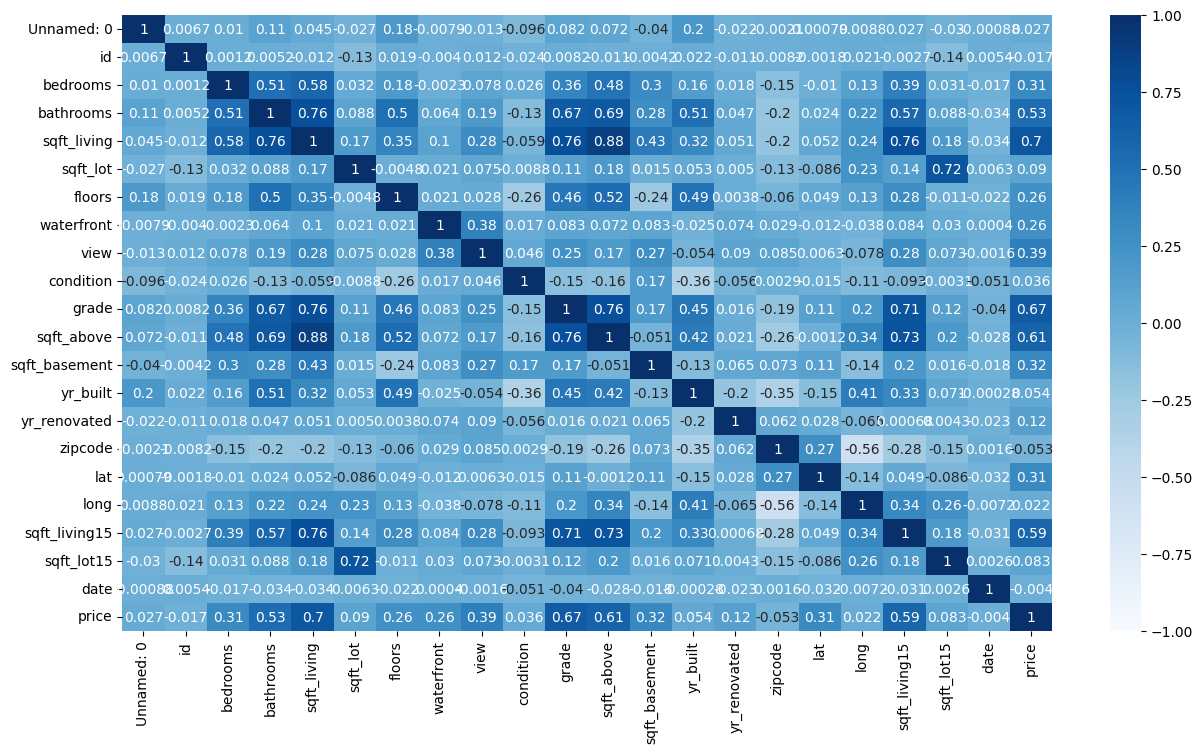

In [2]:
# import the cleaned Data from csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import folium

df = pd.read_csv('data/df_sofar.csv')

# we need to switch the date to timestamp
df['date'] = pd.to_datetime(df['date'])
type(df['date'][0])

# check quickly the data
# head
print(df.head())
# tail
print(df.tail())
# describe
print(df.describe())
# dtypes
print(df.dtypes)
# display correlations in a heat map

corr = df.corr()
corr['price'].sort_values()

plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap = 'Blues' ,  vmin=-1, vmax=1, annot=True)

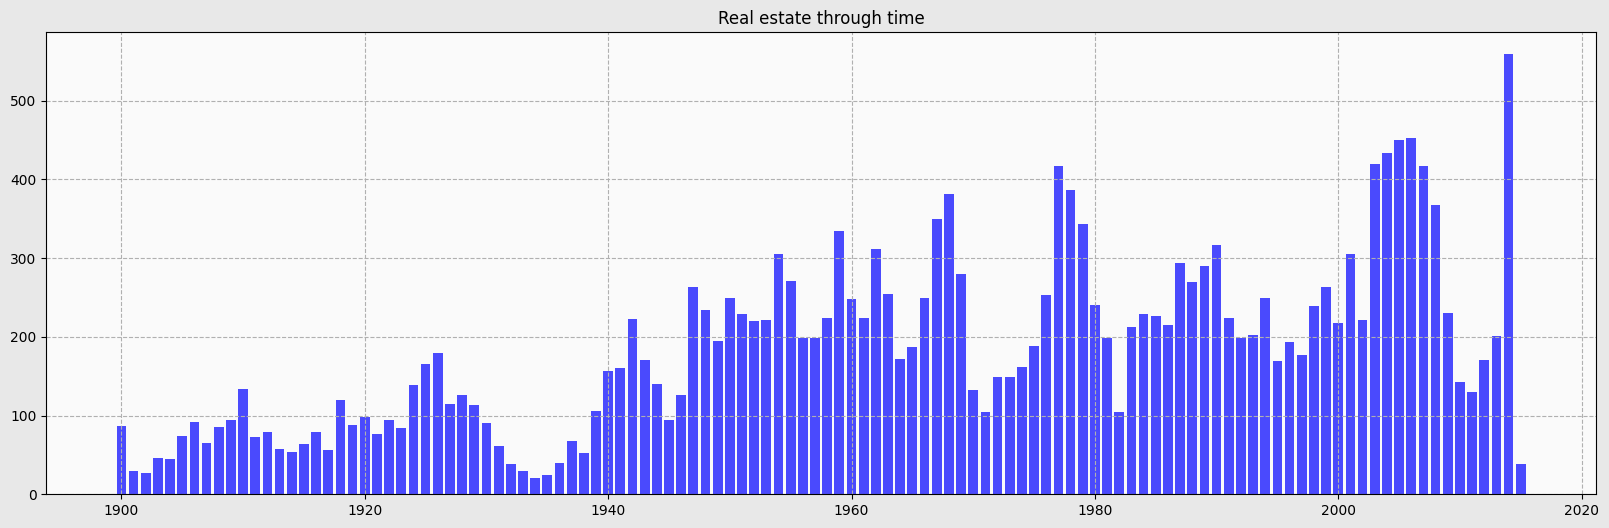

In [3]:
# make a line graph that shows the increase of houses built through time, with semitransparent background
df_homes_time = df.groupby('yr_built').size().reset_index(name='Count') # prepare data in a new df
fig, ax = plt.subplots(figsize=(20,6)) # create the plot
bars = ax.bar(df_homes_time['yr_built'], df_homes_time['Count'], color = 'blue', alpha = 0.7) # plotting the date
ax.set_title('Real estate through time')  # adding Tile
ax.grid(True, which='both', linestyle = '--') # adding grid
# set semitranparent background
fig.patch.set_facecolor('lightgray') # set figure background color
fig.patch.set_alpha(0.5) # set figure background transparency
ax.set_facecolor('white') # Set axis background color
ax.patch.set_alpha(0.8) # set axis background transparency
plt.savefig('data/Real_estate_through_time.png', dpi=300, transparent = True)

<Axes: xlabel='price'>

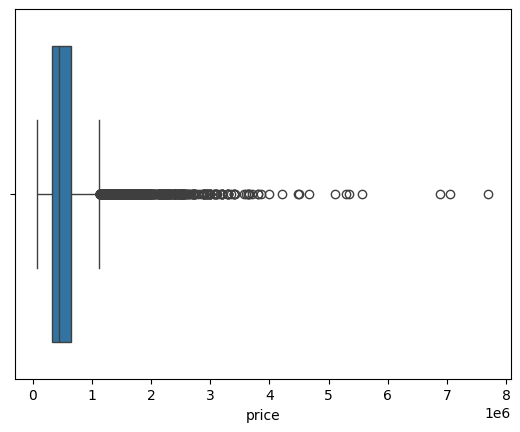

In [4]:
# I need to explore the relationship between location and prices.
# create a new df and drop the outliers
df_zip = df.filter(['zipcode','lat','long','price'])
df_zip
sns.boxplot(x=df_zip['price'])

<Axes: xlabel='price'>

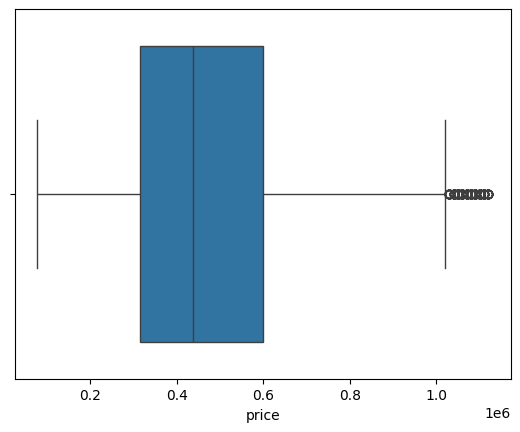

In [5]:
#eliminate outliers in location and prices
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_zip['price'].quantile(0.25)
Q3 = df_zip['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_zip_filtered = df_zip[(df_zip['price'] >= lower_bound) & (df_zip['price'] <= upper_bound)]
sns.boxplot(x=df_zip_filtered['price'])

In [6]:
#map mean prices by zipcode
map_zipcode = df_zip_filtered.groupby('zipcode')[['lat','long', 'price']].mean()
map_zipcode['price'] = map_zipcode['price'].astype(int)
# Calculate the center of the map (average lat/lon)
center_lat = map_zipcode['lat'].mean()
center_lon = map_zipcode['long'].mean()
# Create the map centered at the calculated coordinates
m3 = folium.Map(location=[center_lat, center_lon], zoom_start=12)
# Loop through each row to add a marker for each zipcode with mean sale price as label
for _, row in map_zipcode.iterrows():
    # Format the price as an integer
    price = row['price']
    # Create a subtle grey circle marker
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=(price/50000),  # Size of the circle
        color='grey',  # Circle border color (grey)
        fill=True,  # Fill the circle
        #get the max price and compare to the price of this area, obtain a ratio from 0 to 1
        # transform that to hex
        #use that for a color coded
        fill_color=("#{:06x}".format(price.astype(int) % (1 << 24))),  # Fill color
        fill_opacity=0.6,  # Transparency of the marker
    ).add_to(m3)
# Save the map to a HTML file
m3.save("zipcode_price_map_onlyCircles.html")
# Display the map (if in Jupyter notebook)
m3

C:\Users\email\AppData\Local\Temp\ipykernel_15340\3848248813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqft_liv_price['sqft_living'] = df_sqft_liv_price['sqft_living'].round().astype(int)


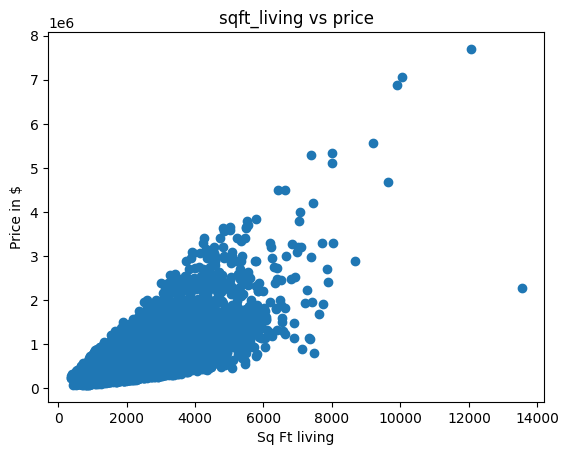

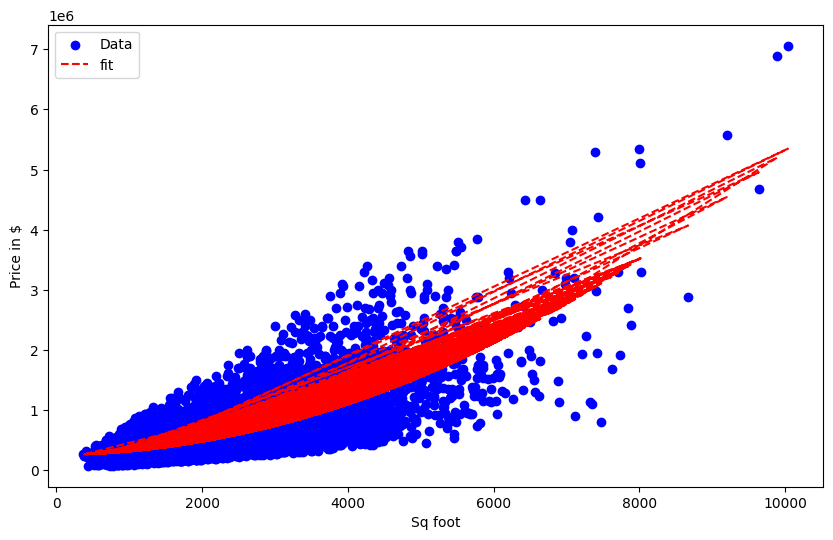

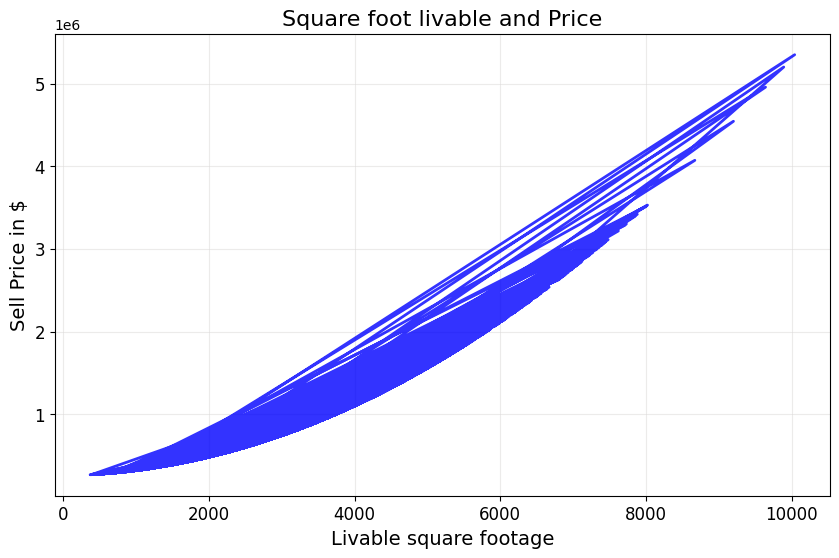

In [ ]:
# create a line graph that shows the property size is in direct relation with price 

# From the heatmap above, The strongest correlation seems to be with sqft_living
# First create a dataframe that includes all data available for sqft_living and price
df_sqft_liv_price = df[['sqft_living','price']]
# Check the range of variables in sqft_living. Is that discrete or continuous?
df_sqft_liv_price['sqft_living'] = df_sqft_liv_price['sqft_living'].round().astype(int)
# It is continuous!, Analize the relation
plt.scatter(df_sqft_liv_price['sqft_living'], df['price'])
plt.xlabel('Sq Ft living')
plt.ylabel('Price in $')
plt.title('sqft_living vs price')
plt.show()
# Need to discard outliers (only the two with the higest sqft)
indices_to_drop = df_sqft_liv_price.nlargest(2,columns='sqft_living').index
df_filtered = df_sqft_liv_price.drop(indices_to_drop)
#Below commented code that is not needed now but keep it for future use on other graphs
    # Calculate percentiles
    ##pl = df_sqft_liv_price['price'].quantile(0.01)
    ##ph = df_sqft_liv_price['price'].quantile(0.99)
    # Filter out outliers
    ##df_filtered = df_sqft_liv_price[(df_sqft_liv_price['price'] >= pl) & (df_sqft_liv_price['price'] <= ph)]
# new relation graph
#from scatter plot to best fit
fig = plt.figure(figsize=(10,6))
coefficients = np.polyfit(df_filtered['sqft_living'], df_filtered['price'],2) # degree of best fit curve
polynomial = np.poly1d(coefficients)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Sq foot')
ax.set_ylabel('Price in $')
ax.scatter(df_filtered['sqft_living'],df_filtered['price'],color='b',label='Data')
ax.plot(df_filtered['sqft_living'],polynomial(df_filtered['sqft_living']),color='r',linestyle='dashed', label='fit') # this is the curve
ax.legend(loc="upper left")

# Create graph for presentation
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_alpha(0) # set background to transparent
ax.patch.set_alpha(0) #set the axis background to transparent
ax.plot(df_filtered['sqft_living'],polynomial(df_filtered['sqft_living']),color='blue', linewidth=2, alpha=0.8) # alpha is line transparency
ax.set_title('Square foot livable and Price', fontsize=16)
ax.set_xlabel('Livable square footage', fontsize=14)
ax.set_ylabel('Sell Price in $', fontsize = 14)
ax.grid(True, which='both', color='#DAD8D7',alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('data/sqft_living.png', transparent=True)

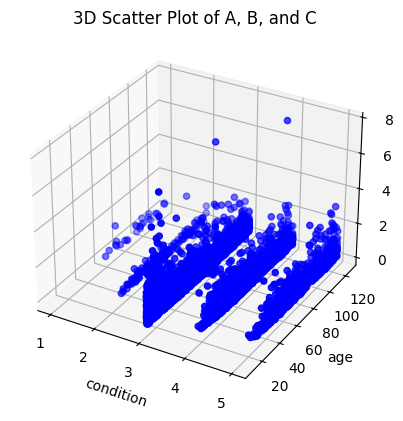

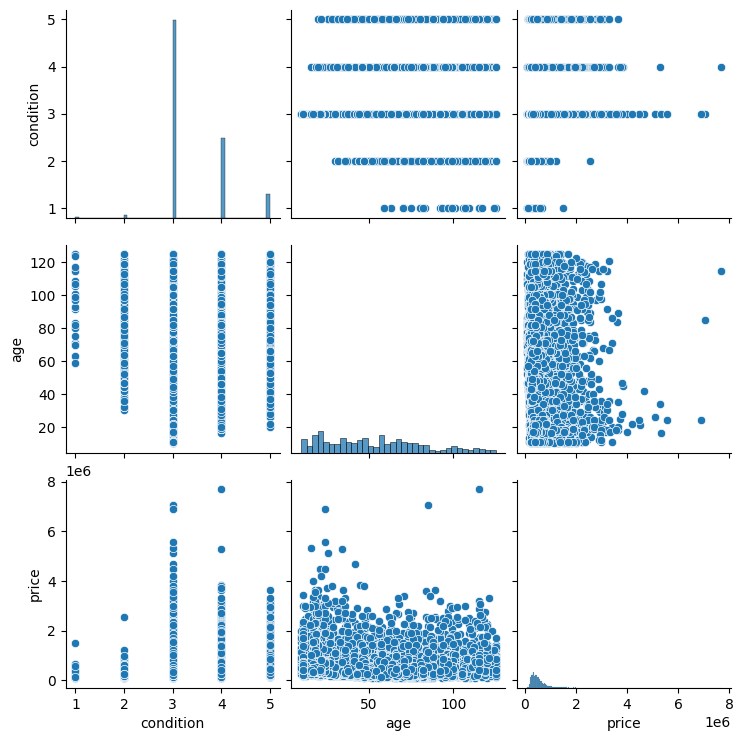

In [33]:
# create a 3D scatter plot where X-axis ins the age, Y is the condition and Z is the sale price
# if not possible , use a 2D scatter with different colors inddicating whether the house has been remodeled
from mpl_toolkits.mplot3d import Axes3D

data = df[['condition', 'yr_built', 'price']].copy() # prepare data in a new df
# Perform an arithmetic operation: create a new column 'age' as the difference of '2025' and 'yr_built'
data['age'] = 2025 - data['yr_built']
data = data[['condition', 'age', 'price']]
# initialize the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# plot data
ax.scatter(data['condition'], data['age'], data['price'], c='b', marker='o')
# set labels
ax.set_xlabel('condition')
ax.set_ylabel('age')
ax.set_zlabel('price')
ax.set_title('3D Scatter Plot of A, B, and C')

import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(data, x='condition', y='age', z='price', title='Interactive 3D Scatter Plot')
# Update layout for larger size
fig.update_layout(
    width=1200,  # Width in pixels
    height=800   # Height in pixels
)
fig.show()
fig.write_html('data/condition_age_price.html')

# not totally happy about the results, I want to explore the relation of the values combined
sns.pairplot(data)
plt.show()

C:\Users\email\AppData\Local\Temp\ipykernel_15340\3196313203.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\email\AppData\Local\Temp\ipykernel_15340\3196313203.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



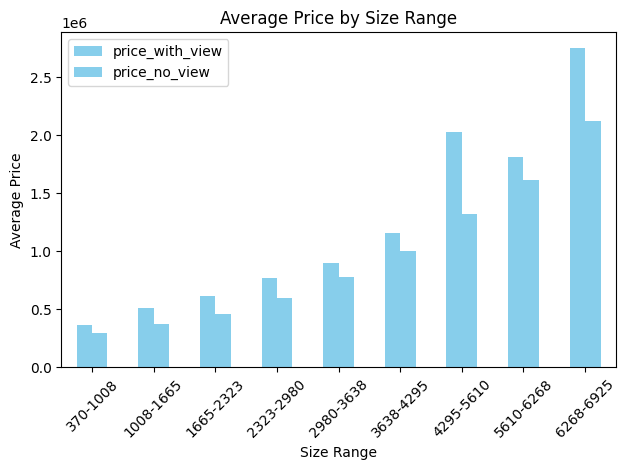

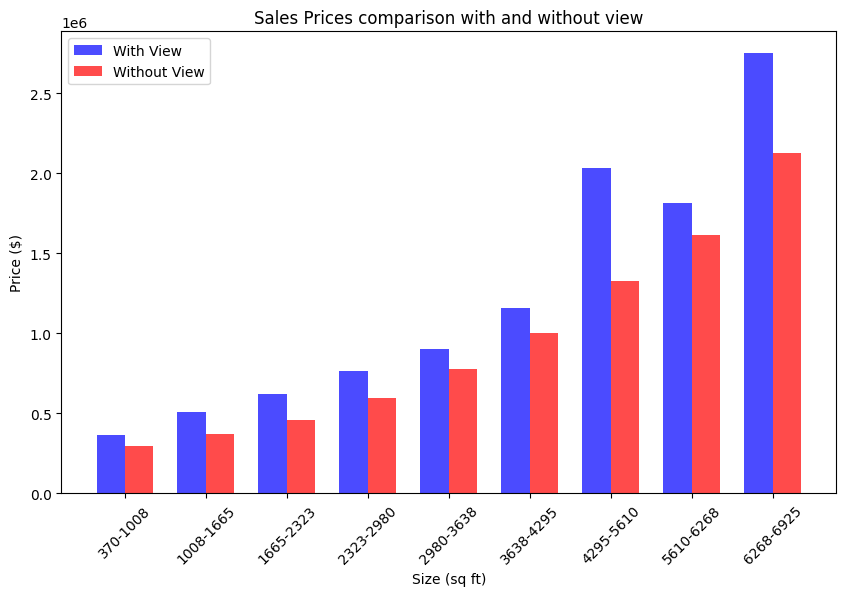

In [117]:
# Bar graph comparing views and Price
# for the same sqft if the house has view, it increases its value
#need two df one with views another without and price
df_with_view = df[df['view'] == 1.0]
df_with_noview = df[df['view'] == 0.0]
df_with_view = df_with_view[['sqft_living','price']]
df_with_noview = df_with_noview[['sqft_living','price']]
#find corr
    #define size ranges
#df_views['sqft_living'].min() # 370 sqft
#df_views['sqft_living'].max() # 13540 sqft
bins = [370,1008,1665,2323,2980,3638,4295,5610,6268,6925]
labels = ['370-1008','1008-1665','1665-2323','2323-2980','2980-3638','3638-4295','4295-5610','5610-6268','6268-6925']
# assign size ranges to data
df_with_view['size_range'] = pd.cut(df_with_view['sqft_living'], bins=bins, labels=labels, right=True)
df_with_noview['size_range'] = pd.cut(df_with_noview['sqft_living'], bins=bins, labels=labels, right=True)
# group by size and calculate average price
avg_price_view = df_with_view.groupby('size_range')['price'].mean()
avg_price_noview = df_with_noview.groupby('size_range')['price'].mean()
avg_price = pd.concat([avg_price_view,avg_price_noview],axis=1)
avg_price = avg_price.dropna()
avg_price.columns = ['price_with_view','price_no_view']
#make bar plot
avg_price.plot(kind='bar', color='skyblue')
plt.xlabel('Size Range')
plt.ylabel('Average Price')
plt.title('Average Price by Size Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#create graph for presentation
# Set the figure size and background
avg_price.reset_index(inplace=True)
plt.figure(figsize=(10, 6), facecolor='none')
# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(avg_price))
# Plot bars
plt.bar(index, avg_price['price_with_view'], bar_width, label='With View', color='b', alpha=0.7)
plt.bar(index + bar_width, avg_price['price_no_view'], bar_width, label='Without View', color='r', alpha=0.7)
# Add labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Sales Prices comparison with and without view')
plt.xticks(index + bar_width / 2  , avg_price['size_range'])
plt.xticks(rotation=45)
plt.legend()
# Remove the background patch to make it transparent
ax = plt.gca()
ax.patch.set_alpha(0)
# Save the plot with a transparent background
plt.savefig('data/view_noview.png', transparent=True)

# Show the plot
###plt.show()



In [126]:
# create map focusing on highways and price
#map mean prices by zipcode
map_zipcode = df_zip_filtered.groupby('zipcode')[['lat','long', 'price']].mean()
map_zipcode['price'] = map_zipcode['price'].astype(int)
# Calculate the center of the map (average lat/lon)
center_lat = map_zipcode['lat'].mean()
center_lon = map_zipcode['long'].mean()
# Create the map centered at the calculated coordinates
m3 = folium.Map(location=[center_lat, center_lon], zoom_start=12)
# Loop through each row to add a marker for each zipcode with mean sale price as label
for _, row in map_zipcode.iterrows():
    # Format the price as an integer
    price = row['price']
    # Create a subtle grey circle marker
    #folium.CircleMarker(
        #location=[row['lat'], row['long']],
        #radius=(price/50000),  # Size of the circle
        #color='grey',  # Circle border color (grey)
        #fill=True,  # Fill the circle
        ##get the max price and compare to the price of this area, obtain a ratio from 0 to 1
        ## transform that to hex
        ##use that for a color coded
        #fill_color=("#{:06x}".format(price.astype(int) % (1 << 24))),  # Fill color
        #fill_opacity=0.6,  # Transparency of the marker
    #).add_to(m3)
    # Create a permanent label
    folium.Marker(
            location=[row['lat'], row['long']],
            icon=folium.DivIcon(html=f'''
                <div style="font-size: 18px; color: blue; font-weight: bold;
                    position: absolute; left: 8px; top: -18px;">
                    {price/1000:.3f}&nbsp$
                </div>
            '''),
            popup=None  # No popup required
        ).add_to(m3)
# Save the map to a HTML file
m3.save("zipcode_price_map_onlyCircles.html")
# Display the map (if in Jupyter notebook)
m3

In [11]:
# bar graph relating upgrades and price for same size

In [12]:
# capitol Hill map Price, mean and median, maybe a gauss distribution

In [13]:
# Ballard map price, mean median, gauss distribution

In [14]:
# West lake map price, mean median, gauss distribution

In [15]:
# Freemont map price, mean median, gauss distribution

In [16]:
# Illustrate the bet time for renovations

In [17]:
# Grade of the Houses related to price